# Speed Dating Dataset
### CIS9655 Final Project by Huida Shi

#### Data Set Link
https://data.world/annavmontoya/speed-dating-experiment


### Data Overview

##### Dataset contains columns which is explained by a doc file on github. 

This is a dataset on a speed dating experiment. Each person have a chance to meet 10 different people. People were given questionaires before the experiment and after each meeting rating their partners. The surverys are extremely insightful in many different way. Lets take a deep dive into this dataset and analyze on dating behavior!
    
    

### LOAD DATA

In [1]:
import warnings
import pandas as pd
import matplotlib.pyplot as plt
from math import pi
import seaborn as sns
import scipy.stats as stat
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [2]:
warnings.filterwarnings("ignore")

In [4]:
df_full=pd.read_csv('/Users/davidshi/dating-master/SpeedDatingData.csv',encoding="ISO-8859-1")

In [5]:
df_full.head()

,iid,id,gender,idg,condtn,wave,round,position,positin1,order,...,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3
0,1,1.0,0,1,1,1,10,7,NaN,4,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
1,1,1.0,0,1,1,1,10,7,NaN,3,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
2,1,1.0,0,1,1,1,10,7,NaN,10,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
3,1,1.0,0,1,1,1,10,7,NaN,5,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
4,1,1.0,0,1,1,1,10,7,NaN,7,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN


In [6]:
df_full.describe()

,iid,id,gender,idg,condtn,wave,round,position,positin1,order,...,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3
count,8378.000000,8377.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,6532.000000,8378.000000,...,3974.000000,3974.000000,3974.000000,3974.000000,3974.000000,2016.000000,2016.000000,2016.000000,2016.000000,2016.000000
mean,283.675937,8.960248,0.500597,17.327166,1.828837,11.350919,16.872046,9.042731,9.295775,8.927668,...,7.240312,8.093357,8.388777,7.658782,7.391545,6.810020,7.615079,7.932540,7.155258,7.048611
std,158.583367,5.491329,0.500029,10.940735,0.376673,5.995903,4.358458,5.514939,5.650199,5.477009,...,1.576596,1.610309,1.459094,1.744670,1.961417,1.507341,1.504551,1.340868,1.672787,1.717988
min,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,5.000000,1.000000,1.000000,1.000000,...,2.000000,2.000000,3.000000,2.000000,1.000000,2.000000,2.000000,4.000000,1.000000,1.000000
25%,154.000000,4.000000,0.000000,8.000000,2.000000,7.000000,14.000000,4.000000,4.000000,4.000000,...,7.000000,7.000000,8.000000,7.000000,6.000000,6.000000,7.000000,7.000000,6.000000,6.000000
50%,281.000000,8.000000,1.000000,16.000000,2.000000,11.000000,18.000000,8.000000,9.000000,8.000000,...,7.000000,8.000000,8.000000,8.000000,8.000000,7.000000,8.000000,8.000000,7.000000,7.000000
75%,407.000000,13.000000,1.000000,26.000000,2.000000,15.000000,20.000000,13.000000,14.000000,13.000000,...,8.000000,9.000000,9.000000,9.000000,9.000000,8.000000,9.000000,9.000000,8.000000,8.000000
max,552.000000,22.000000,1.000000,44.000000,2.000000,21.000000,22.000000,22.000000,22.000000,22.000000,...,12.000000,12.000000,12.000000,12.000000,12.000000,10.000000,10.000000,10.000000,10.000000,10.000000


In [7]:
df_full[['iid','pid']][(df_full['iid']==3)]

,iid,pid
20,3,11.0
21,3,12.0
22,3,13.0
23,3,14.0
24,3,15.0
25,3,16.0
26,3,17.0
27,3,18.0
28,3,19.0
29,3,20.0


In [8]:
df_full.shape

(8378, 195)

Shape of data is 8378 rows, 195 attributes.

In [9]:
pd.options.display.max_rows = 10
df_full.isnull().sum()

iid            0
id             1
gender         0
idg            0
condtn         0
            ... 
attr5_3     6362
sinc5_3     6362
intel5_3    6362
fun5_3      6362
amb5_3      6362
Length: 195, dtype: int64

**so many null values. Let's create a second DataFrame representing each participant only once**

In [10]:
identity = ['iid','wave','age','gender']
df_age = df_full[identity].drop_duplicates().copy()

In [11]:
df_age.gender.value_counts(dropna=False)

1    277
0    274
Name: gender, dtype: int64

**1 = male**  
**0 = female**

### AGE DISTRIBUTION

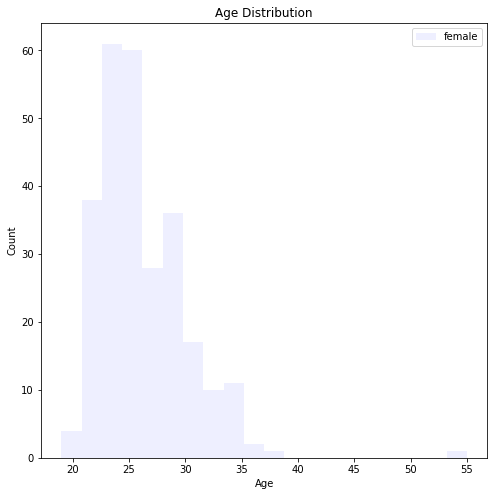

In [16]:
dfboy=df_age[df_age['gender']==1]
dfgirl=df_age[df_age['gender']==0]
plt.figure(figsize=(8,8))
plt.hist(dfgirl['age'],bins=20,color='#eeefff',alpha=1, label = 'female')

plt.title('Age Distribution')
plt.ylabel('Count')
plt.xlabel('Age')
plt.legend(loc = 'upper right')


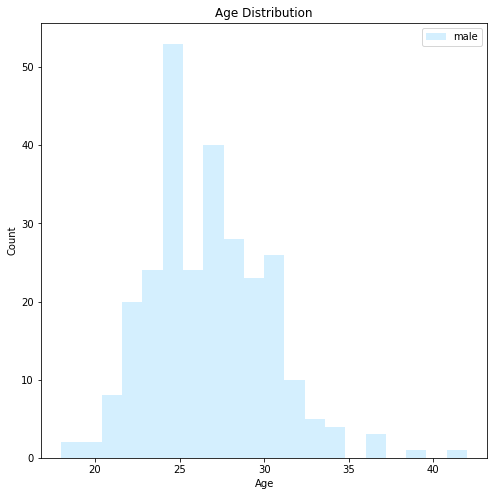

In [19]:
plt.figure(figsize=(8,8))
plt.hist(dfboy['age'],bins=20,color='#72CCFD',alpha=0.3, label = 'male')

plt.title('Age Distribution')
plt.ylabel('Count')
plt.xlabel('Age')
plt.legend(loc = 'upper right')

**Histogram of female is more right skewed than male. This means female average age is lower than male average age in this speed dating experiment. Women have more pressure to get married earlier from society because theres a stigma with single older women. In addition women have a shorter biological clock to mate due to decrease quality in eggs at older ages. There is a count difference due to the presence of Na's in the age column**

## Attribute Analysis by Visual

**Next I want to take a look at what attributes people think are most important. Participants were given a questionnaire before the speed date rounds. There is a section where participants are asked what they look for in the opposite sex. They are asked to allocated 100 points between 6 characteristics.**  

**intel1_1 : intelligence**  
**sinc1_1  : sincere**  
**attr1_1  : attractive**  
**fun1_1   : fun**  
**amb1_1   : ambition**   
**shar1_1  : shared interest**

Reference used to make radar charts
https://python-graph-gallery.com/391-radar-chart-with-several-individuals/

In [12]:
attribute = ['attractive', 'sincere','intelligence','fun','ambition','interest']
categories = ['attr1_1','sinc1_1','intel1_1','fun1_1','amb1_1','shar1_1']
df_want = df_full[['iid', 'wave', 'gender'] + categories].drop_duplicates().copy()

In [13]:
df_want.shape

(551, 9)

In [14]:
N = len(categories)
values=[df_want.attr1_1.mean(),
        df_want.sinc1_1.mean(),
        df_want.intel1_1.mean(),
        df_want.fun1_1.mean(),
        df_want.amb1_1.mean(),
        df_want.shar1_1.mean(),
        df_want.attr1_1.mean()]

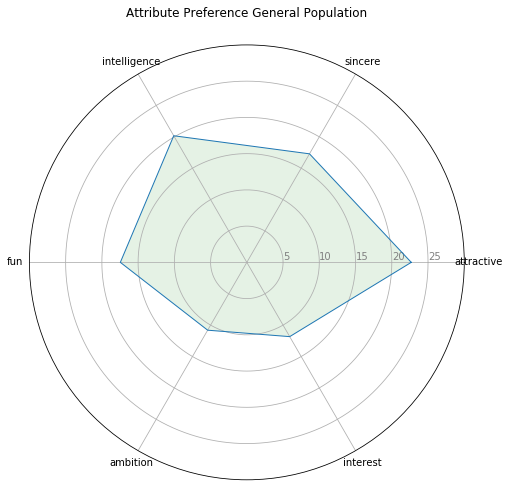

In [15]:
angles = [n/ float(N) * 2 * pi for n in range (N)]
angles += angles[:1]
plt.figure(figsize=(8,8))
ax = plt.subplot(111, polar=True)
plt.xticks(angles[:-1], attribute)
ax.set_rlabel_position(0)
plt.yticks([5,10,15,20,25], ['5','10','15','20','25'], color="grey", size=10)
plt.ylim(0,30)
plt.title('Attribute Preference General Population')
ax.plot(angles, values, linewidth=1, linestyle='solid')
ax.fill(angles, values, 'g', alpha=0.1)

**Attractivness have the highest value compared to the other attributes. Intelligence came as a close second. Ambition and shared interest have the lowest value. Physical looks have a average close to 25/100. If we lived in a advanced world where people have total ratings, 25% of it will be based on physical appearance.**

In [16]:
values_m=[df_want[df_want['gender']==1].attr1_1.mean(),
        df_want[df_want['gender']==1].sinc1_1.mean(),
        df_want[df_want['gender']==1].intel1_1.mean(),
        df_want[df_want['gender']==1].fun1_1.mean(),
        df_want[df_want['gender']==1].amb1_1.mean(),
        df_want[df_want['gender']==1].shar1_1.mean(),
        df_want[df_want['gender']==1].attr1_1.mean()]

In [17]:
values_f=[df_want[df_want['gender']==0].attr1_1.mean(),
        df_want[df_want['gender']==0].sinc1_1.mean(),
        df_want[df_want['gender']==0].intel1_1.mean(),
        df_want[df_want['gender']==0].fun1_1.mean(),
        df_want[df_want['gender']==0].amb1_1.mean(),
        df_want[df_want['gender']==0].shar1_1.mean(),
        df_want[df_want['gender']==0].attr1_1.mean()]

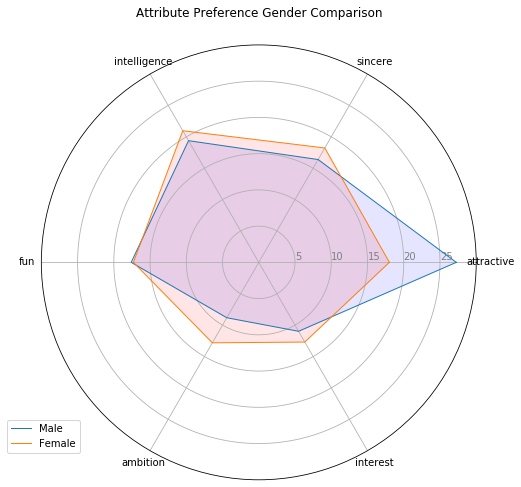

In [18]:
plt.figure(figsize=(8,8))
ax = plt.subplot(111, polar=True)
plt.xticks(angles[:-1], attribute)
ax.set_rlabel_position(0)
plt.yticks([5,10,15,20,25], ['5','10','15','20','25'], color="grey", size=10)
plt.ylim(0,30)
plt.title('Attribute Preference Gender Comparison')
ax.plot(angles, values_m, linewidth=1, linestyle='solid', label="Male")
ax.fill(angles, values_m, 'b', alpha=0.1)
ax.plot(angles, values_f, linewidth=1, linestyle='solid', label="Female")
ax.fill(angles, values_f, 'r', alpha=0.1)
plt.legend(loc='right', bbox_to_anchor=(0.1, 0.1))

**Men looks for attractivness, women look for intelligence. Are men really that shallow? This chart looks ridiculous. I guess I am very different from the average male, I value ambition to a large extent.**

**I want to make another interesting comparison, participants are asked what they think the OPPOSITE sex looks for. I want to see if participants prediction closely reflect to the truth.**

In [19]:
categories2 = ['attr2_1','sinc2_1','intel2_1','fun2_1','amb2_1','shar2_1']
df_want2 = df_full[['iid', 'wave', 'gender'] + categories2].drop_duplicates().copy()

In [20]:
values_m_pred=[df_want2[df_want2['gender']==1].attr2_1.mean(),
        df_want2[df_want2['gender']==1].sinc2_1.mean(),
        df_want2[df_want2['gender']==1].intel2_1.mean(),
        df_want2[df_want2['gender']==1].fun2_1.mean(),
        df_want2[df_want2['gender']==1].amb2_1.mean(),
        df_want2[df_want2['gender']==1].shar2_1.mean(),
        df_want2[df_want2['gender']==1].attr2_1.mean()]

In [21]:
values_f_pred=[df_want2[df_want2['gender']==0].attr2_1.mean(),
        df_want2[df_want2['gender']==0].sinc2_1.mean(),
        df_want2[df_want2['gender']==0].intel2_1.mean(),
        df_want2[df_want2['gender']==0].fun2_1.mean(),
        df_want2[df_want2['gender']==0].amb2_1.mean(),
        df_want2[df_want2['gender']==0].shar2_1.mean(),
        df_want2[df_want2['gender']==0].attr2_1.mean()]

**values_m_pred : what men think women looks for**   
**values_f_pred : what women think men look for**

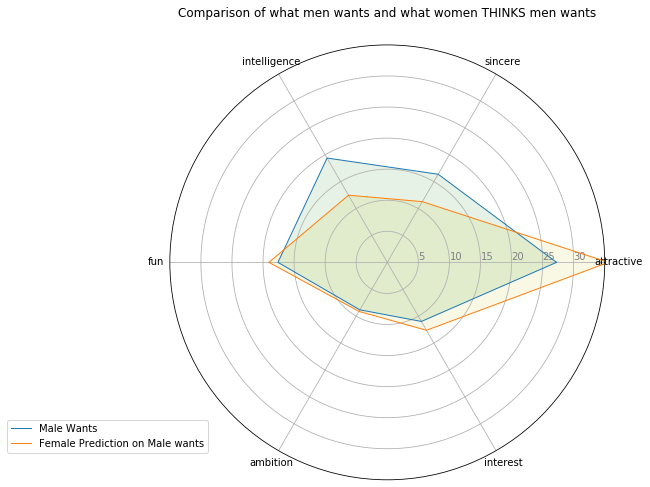

In [22]:
plt.figure(figsize=(8,8))
ax = plt.subplot(111, polar=True)
plt.xticks(angles[:-1], attribute)
ax.set_rlabel_position(0)
plt.yticks([5,10,15,20,25,30], ['5','10','15','20','25','30'], color="grey", size=10)
plt.ylim(0,35)
plt.title('Comparison of what men wants and what women THINKS men wants')
ax.plot(angles, values_m, linewidth=1, linestyle='solid', label="Male Wants")
ax.fill(angles, values_m, 'g', alpha=0.1)
ax.plot(angles, values_f_pred, linewidth=1, linestyle='solid', label="Female Prediction on Male wants")
ax.fill(angles, values_f_pred, 'y', alpha=0.1)
plt.legend(loc='right', bbox_to_anchor=(0.1, 0.1))

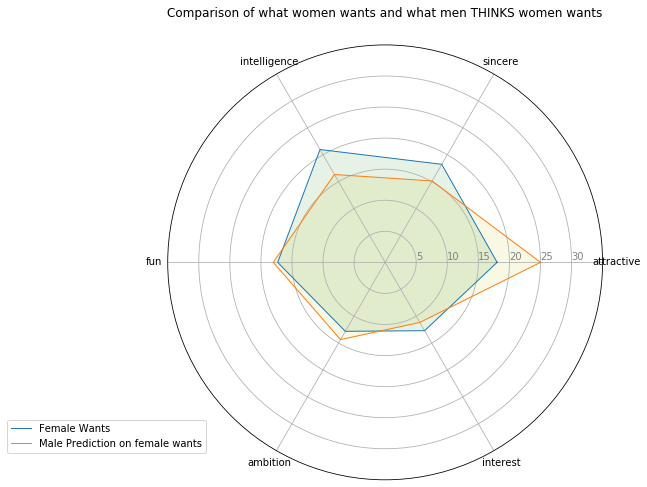

In [23]:
plt.figure(figsize=(8,8))
ax = plt.subplot(111, polar=True)
plt.xticks(angles[:-1], attribute)
ax.set_rlabel_position(0)
plt.yticks([5,10,15,20,25,30], ['5','10','15','20','25','30'], color="grey", size=10)
plt.ylim(0,35)
plt.title('Comparison of what women wants and what men THINKS women wants')
ax.plot(angles, values_f, linewidth=1, linestyle='solid', label="Female Wants")
ax.fill(angles, values_f, 'g', alpha=0.1)
ax.plot(angles, values_m_pred, linewidth=1, linestyle='solid', label="Male Prediction on female wants")
ax.fill(angles, values_m_pred, 'y', alpha=0.1)
plt.legend(loc='right', bbox_to_anchor=(0.1, 0.1))

**wow what a surprise. Both genders underestimated how much people value intelligence/sincerity and overestimated the importance of attractivenss. This is great news for all the ugly people out there!** 

## Attribute Analysis by Statistics


I want to analyze what attribute have the most effect on success rate. Success rate is calculated by  

dec_o for unique iid ( number of people who said yes to the participant) / total row of data for unique iid (number of total dates)


attributes were calculated by averaging what partners rated the person. attributes is plotted against success rate to find strength of linear relationship

Lastly I did a correlation chart between attributes and success rate

In [20]:
df_psy=df_full[['iid', 'wave','exphappy','age','field','field_cd','expnum','race']].drop_duplicates().copy()

In [25]:
df_psy=df_psy.set_index('iid')

In [26]:
temp = df_full.groupby(['iid']).count()

In [27]:
df_psy['# of dates'] = temp['id']

In [28]:
df_psy['# of yes'] = df_full.groupby(['iid']).dec_o.sum()

In [29]:
df_psy['success rate'] = df_psy['# of yes'] / df_psy['# of dates']

In [30]:
df_psy

,wave,exphappy,age,field,field_cd,expnum,race,# of dates,# of yes,success rate
iid,,,,,,,,,,
1,1,3.0,21.0,Law,1.0,2.0,4.0,10,5,0.500000
2,1,4.0,24.0,law,1.0,5.0,2.0,10,6,0.600000
3,1,4.0,25.0,Economics,2.0,2.0,2.0,10,5,0.500000
4,1,1.0,23.0,Law,1.0,2.0,2.0,10,6,0.600000
5,1,7.0,21.0,Law,1.0,10.0,2.0,10,3,0.300000
...,...,...,...,...,...,...,...,...,...,...
548,21,7.0,30.0,Business,8.0,NaN,2.0,22,10,0.454545
549,21,5.0,28.0,General management/finance,8.0,NaN,2.0,22,10,0.454545
550,21,7.0,30.0,MBA,8.0,NaN,2.0,22,6,0.272727


In [31]:
df_psy['attr_o'] = df_full.groupby(['iid']).attr_o.sum() / df_psy['# of dates']
df_psy['sinc_o'] = df_full.groupby(['iid']).sinc_o.sum() / df_psy['# of dates']
df_psy['intel_o'] = df_full.groupby(['iid']).intel_o.sum() / df_psy['# of dates']
df_psy['fun_o'] = df_full.groupby(['iid']).fun_o.sum() / df_psy['# of dates']
df_psy['amb_o'] = df_full.groupby(['iid']).amb_o.sum() / df_psy['# of dates']
df_psy['shar_o'] = df_full.groupby(['iid']).shar_o.sum() / df_psy['# of dates']

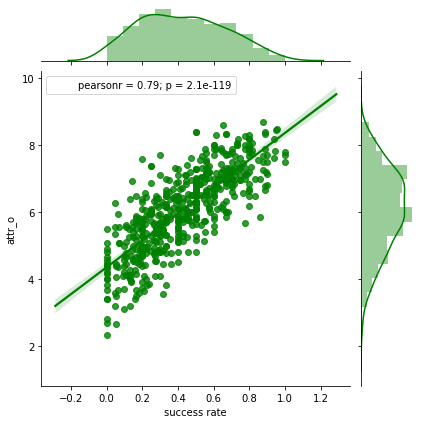

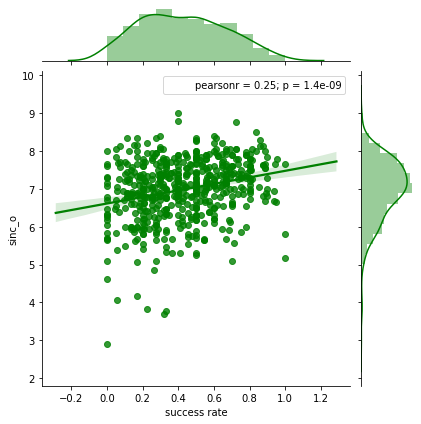

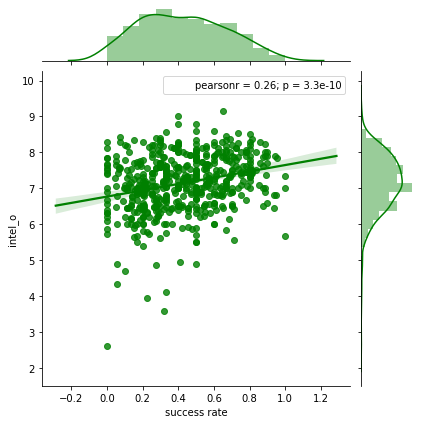

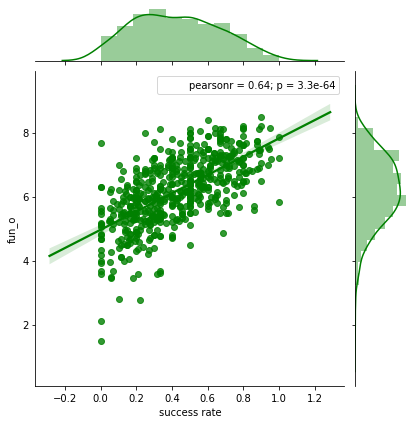

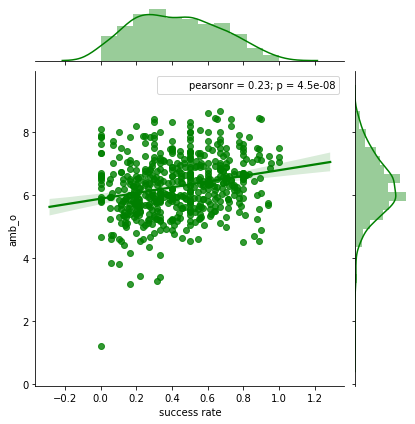

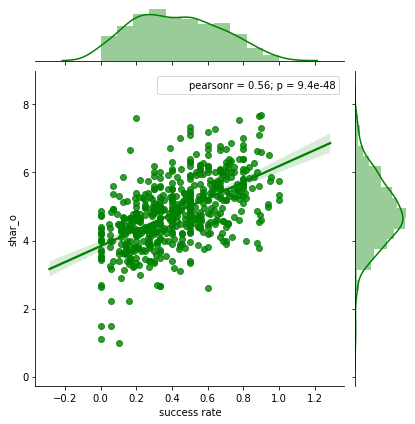

In [32]:
#figure, (ax1, ax2) = plt.subplots(ncols=2, sharey=True,figsize=(12,6))
sns.jointplot(x="success rate", y="attr_o", data=df_psy, color = 'g', kind="reg",stat_func=stat.pearsonr)
sns.jointplot(x="success rate", y="sinc_o", data=df_psy, color = 'g', kind="reg",stat_func=stat.pearsonr)
sns.jointplot(x="success rate", y="intel_o", data=df_psy, color = 'g', kind="reg",stat_func=stat.pearsonr)
sns.jointplot(x="success rate", y="fun_o", data=df_psy, color = 'g', kind="reg",stat_func=stat.pearsonr)
sns.jointplot(x="success rate", y="amb_o", data=df_psy, color = 'g', kind="reg",stat_func=stat.pearsonr)
sns.jointplot(x="success rate", y="shar_o", data=df_psy, color = 'g', kind="reg",stat_func=stat.pearsonr)

## Success Rate by Profession

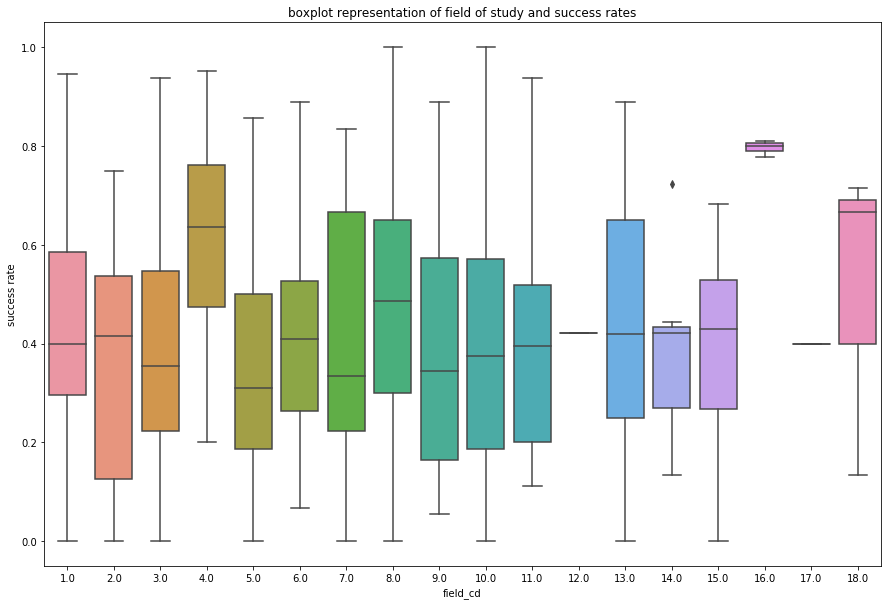

In [33]:
plt.figure(figsize=(15,10))
plt.title('boxplot representation of field of study and success rates')
sns.boxplot(x="field_cd", y="success rate", data=df_psy)

1= Law    
2= Math  
3= Social Science, Psychologist   
4= Medical Science, Pharmaceuticals, and Bio Tech  
5= Engineering    
6= English/Creative Writing/ Journalism  
7= History/Religion/Philosophy   
8= Business/Econ/Finance   
9= Education, Academia   
10= Biological Sciences/Chemistry/Physics  
11= Social Work   
12= Undergrad/undecided   
13=Political Science/International Affairs   
14=Film  
15=Fine Arts/Arts Administration  
16=Languages  
17=Architecture  
18=Other

boxplot representation of success rate by field of study. #16 have low sample size so biased, #4 is languages.

## Confidence Radar Chart

comparison between self rated attributes vs attribute average rated by partners

In [34]:
df_psy['attr3_1'] = df_full.groupby(['iid']).attr3_1.sum() / df_psy['# of dates']
df_psy['sinc3_1'] = df_full.groupby(['iid']).sinc3_1.sum() / df_psy['# of dates']
df_psy['intel3_1'] = df_full.groupby(['iid']).intel3_1.sum() / df_psy['# of dates']
df_psy['fun3_1'] = df_full.groupby(['iid']).fun3_1.sum() / df_psy['# of dates']
df_psy['amb3_1'] = df_full.groupby(['iid']).amb3_1.sum() / df_psy['# of dates']

df_psy['rating self'] = (df_psy['attr3_1'] + df_psy['sinc3_1'] + df_psy['intel3_1'] + df_psy['fun3_1'] + 
                         df_psy['amb3_1']) / 5

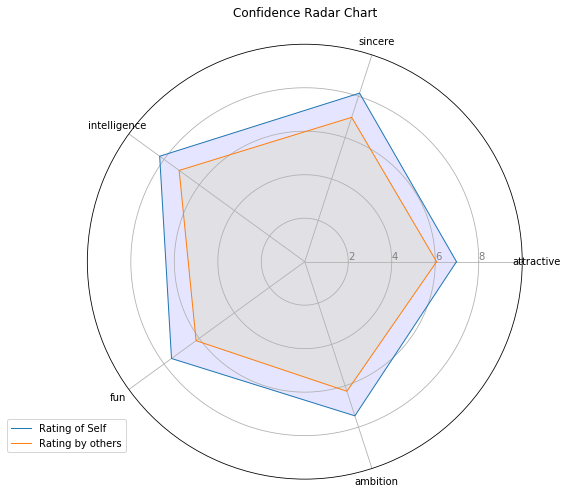

In [35]:
values_self=[df_psy.attr3_1.mean(),
        df_psy.sinc3_1.mean(),
        df_psy.intel3_1.mean(),
        df_psy.fun3_1.mean(),
        df_psy.amb3_1.mean(),
        df_psy.attr3_1.mean()]

values_rating=[df_psy.attr_o.mean(),
        df_psy.sinc_o.mean(),
        df_psy.intel_o.mean(),
        df_psy.fun_o.mean(),
        df_psy.amb_o.mean(),
        df_psy.attr_o.mean()]

plt.figure(figsize=(8,8))
ax = plt.subplot(111, polar=True)
angles = [n/ float(5) * 2 * pi for n in range (5)]
angles += angles[:1]
plt.xticks(angles[:-1], attribute)
ax.set_rlabel_position(0)
plt.yticks([2,4,6,8], ['2','4','6','8'], color="grey", size=10)
plt.ylim(0,10)
plt.title('Confidence Radar Chart')
ax.plot(angles, values_self, linewidth=1, linestyle='solid', label="Rating of Self")
ax.fill(angles, values_self, 'b', alpha=0.1)
ax.plot(angles, values_rating, linewidth=1, linestyle='solid', label="Rating by others")
ax.fill(angles, values_rating, 'y', alpha=0.1)
plt.legend(loc='right', bbox_to_anchor=(0.1, 0.1))

In [36]:
df_psy['rating avg'] = (df_psy['attr_o'] + df_psy['sinc_o'] + df_psy['intel_o'] + df_psy['fun_o'] + df_psy['amb_o']
                        ) / 5

In [37]:
df_psy['confidence level'] = df_psy['rating self'] / df_psy['rating avg']

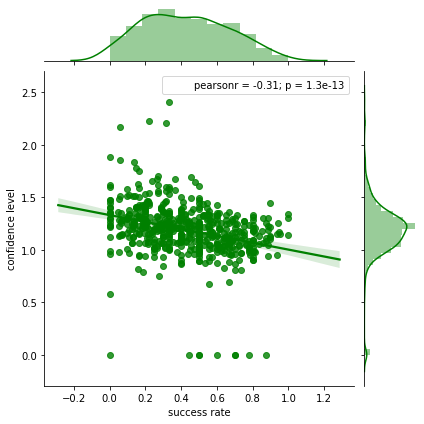

In [38]:
sns.jointplot(x="success rate", y="confidence level", data=df_psy, color = 'g', kind="reg",stat_func=stat.pearsonr)

## Analysis on Pairing


In [42]:
dftemp=df_full.dropna(subset=['int_corr','pid','age_o','age','race','race_o'])
dftemp = dftemp[dftemp['int_corr']!=0].copy()

In [43]:
dftemp.shape

(8074, 196)

Creating a primary key to show each date only once

In [44]:
dftemp['pair_val'] = (dftemp['iid']*dftemp['pid']+dftemp['race']+dftemp['race_o']+
                      (dftemp['int_corr']*dftemp['int_corr'])+(dftemp['age']*dftemp['age_o']))

In [45]:
dftemp=dftemp.sort_values(by=['pair_val','gender'])

In [46]:
dftemp.pivot_table(index=['pair_val'],aggfunc = 'size').max()

4

In [47]:
dftemp.pivot_table(index=['pair_val'],aggfunc = 'size').min()

2

In [48]:
dftemp.groupby('pair_val').filter(lambda x : len(x)>2)[['iid','pid','pair_val','gender']]

,iid,pid,pair_val,gender
55,6,16.0,677.0361,0
60,7,11.0,677.0361,0
106,11,7.0,677.0361,1
155,16,6.0,677.0361,1
387,32,51.0,2259.1681,0
...,...,...,...,...
724,51,32.0,2259.1681,1
1981,147,163.0,24643.2601,0
2056,152,158.0,24643.2601,0
2162,158,152.0,24643.2601,1


In [49]:
dftemp.groupby('pair_val').filter(lambda x : len(x)<3)[['iid','pid','pair_val','gender']]

,iid,pid,pair_val,gender
1,1,12.0,480.2916,0
110,12,1.0,480.2916,1
2,1,13.0,483.0256,0
120,13,1.0,483.0256,1
3,1,14.0,503.3721,0
...,...,...,...,...
8376,552,529.0,292564.3844,1
7892,530,551.0,292629.1024,0
8355,551,530.0,292629.1024,1
7893,530,552.0,293116.0001,0


In [50]:
dftemp = dftemp.groupby('pair_val').filter(lambda x : len(x)<3)

In [51]:
dftemp=dftemp[['match','pair_val','int_corr','iid','pid','gender','attr_o','sinc_o','intel_o','fun_o','amb_o','shar_o','age'
               ,'race','dec_o','goal','date',
              'go_out','attr1_1','sinc1_1','intel1_1','fun1_1','amb1_1','shar1_1']]

In [53]:
left = dftemp[~dftemp.pair_val.duplicated(keep='first')]

In [54]:
right = dftemp[~dftemp.pair_val.duplicated(keep='last')]

In [55]:
left.shape

(4031, 24)

In [56]:
right.shape

(4031, 24)

In [57]:
left['iid'].sum()

1114310

In [58]:
right['pid'].sum()

1114310.0

In [61]:
left['gender'].max()


0

In [62]:
right['gender'].max()

1

In [63]:
right = right.rename(columns={'iid':'iidM','attr_o':'attr_o2','sinc_o':'sinc_o2','intel_o':'intel_o2'
                              ,'fun_o':'fun_o2','amb_o':'amb_o2'
                      ,'shar_o':'shar_o2'
                      ,'age':'ageM','race':'raceM','dec_o':'dec_o2','goal':'goalM'
                      ,'date':'dateM', 'go_out':'go_outM'
                      ,'attr1_1':'attr1_1M','sinc1_1':'sinc1_1M','intel1_1':'intel1_1M','fun1_1':'fun1_1M',
                      'amb1_1':'amb1_1M','shar1_1':'shar1_1M'})

In [64]:
rightdf = right[['pair_val','iidM','attr_o2','sinc_o2','intel_o2','fun_o2','amb_o2','shar_o2','ageM'
                 ,'raceM','dec_o2','goalM','dateM',
              'go_outM','attr1_1M','sinc1_1M','intel1_1M','fun1_1M','amb1_1M','shar1_1M']]

In [65]:
leftdf = left[['match','pair_val','int_corr','iid','attr_o','sinc_o','intel_o','fun_o','amb_o','shar_o','age'
               ,'race','dec_o','goal','date',
              'go_out','attr1_1','sinc1_1','intel1_1','fun1_1','amb1_1','shar1_1']]

In [66]:
dfml = leftdf.merge(rightdf,on =  'pair_val',how='left')

In [67]:
dfml.shape

(4031, 41)

#### Percantage of dates that Matched

In [68]:
dfml.match.sum() / 4031 #looking for % match

0.16497147109898289

#### Percentage of dates where women are rejected

In [69]:
( len(dfml[(dfml['dec_o']==0) & (dfml['dec_o2']==1)]) ) / 4031   # rejected girls

0.20267923592160755

#### Percentage of dates where men are rejected

In [70]:
( len(dfml[(dfml['dec_o']==1) & (dfml['dec_o2']==0)]) ) / 4031   #guys

0.30960059538576035

#### Percentage of dates where both gender have no interest

In [71]:
( len(dfml[(dfml['dec_o']==0) & (dfml['dec_o2']==0)]) ) / 4031  #no interest from both sides

0.3227486975936492

## Perdiction on Match Using Logistic Regression

In [76]:
dfml = dfml.dropna(subset = ['dateM']).copy()

In [77]:
dfml = dfml.fillna(dfml.mean())

In [78]:
y = dfml['match']

In [79]:
X = dfml.drop(columns=['match', 'dec_o','dec_o2','pair_val'])

In [80]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X,y,test_size = 0.2)
clf = LogisticRegression(random_state=0)
model = clf.fit(X,y)
pred_train = model.predict(Xtrain)
pred_test = model.predict(Xtest)

In [81]:
accuracy_score(ytrain, pred_train)

0.8526479750778816

In [82]:
accuracy_score(ytest, pred_test)

0.8729763387297634

In [83]:
clf = LogisticRegression(random_state=0)

In [84]:
results = pd.DataFrame(columns = ['Train Score', 'Test Score']) 

In [85]:
for i in range(100):
    Xtrain, Xtest, ytrain, ytest = train_test_split(X,y,test_size = 0.2,random_state=i)
    model = clf.fit(X,y)
    pred_train = model.predict(Xtrain)
    pred_test = model.predict(Xtest)
    results = results.append({'Train Score' : accuracy_score(ytrain, pred_train), 
                              'Test Score' : accuracy_score(ytest, pred_test)}, ignore_index = True)

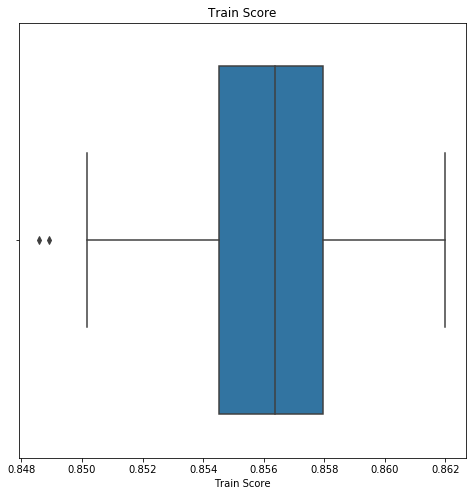

In [86]:
plt.figure(figsize=(8,8))
plt.title('Train Score')
sns.boxplot(x=results['Train Score'])

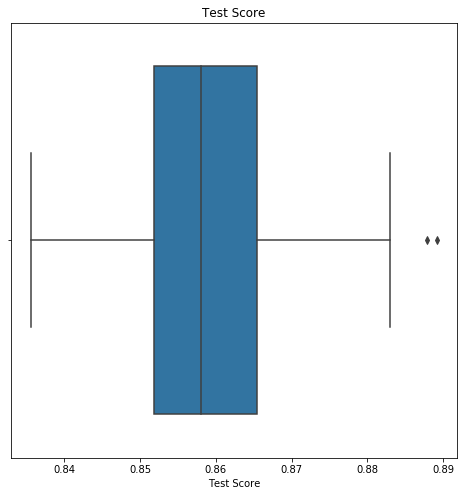

In [87]:
plt.figure(figsize=(8,8))
plt.title('Test Score')
sns.boxplot(x=results['Test Score'])
